<a href="https://colab.research.google.com/github/CindrellaFernandes/Students-marks-prediction/blob/main/student_marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Student marks prediction/Student_Marks.csv")
print(df)

    number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [3]:
data = {
    'Hours': [1,2,3,4,5,6,7,8,9,10],
    'Marks': [20,30,35,40,50,55,65,70,80,90]
}

df = pd.DataFrame(data)
print(df)


   Hours  Marks
0      1     20
1      2     30
2      3     35
3      4     40
4      5     50
5      6     55
6      7     65
7      8     70
8      9     80
9     10     90


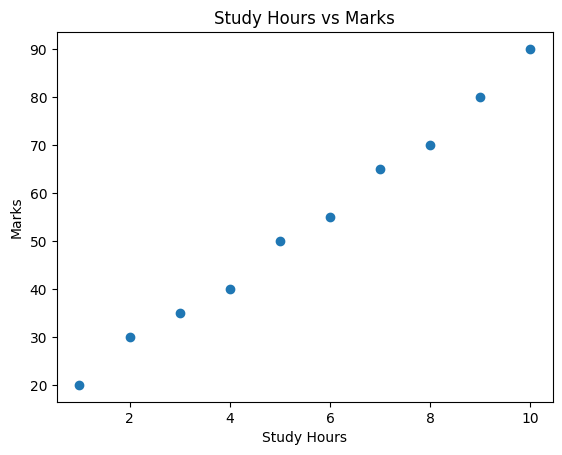

In [4]:
plt.scatter(df['Hours'], df['Marks'])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks")
plt.show()


In [5]:
X = df[['Hours']]   # Independent variable
y = df['Marks']     # Dependent variable


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)
print("Predicted Marks:", y_pred)


Predicted Marks: [34.74559687 79.59882583]


In [9]:
error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", error)


Mean Absolute Error: 0.3277886497064557


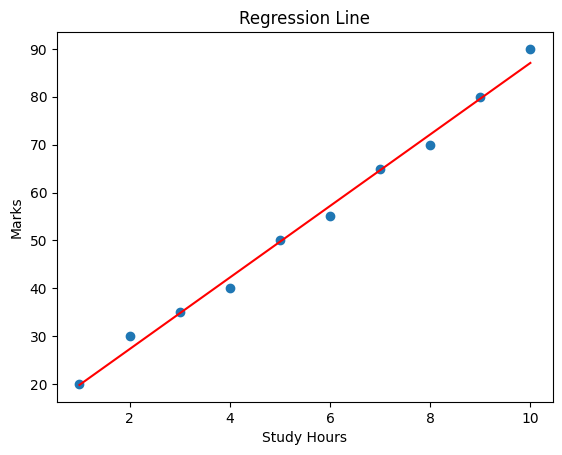

In [10]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Regression Line")
plt.show()


In [11]:
hours = [[7]]
predicted_marks = model.predict(hours)
print("Predicted Marks for 6 hours study:", predicted_marks[0])


Predicted Marks for 6 hours study: 64.64774951076322


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import gradio as gr

# Dataset
data = {
    "Hours": [1,2,3,4,5,6,7,8,9,10],
    "Marks": [20,30,35,40,50,55,65,70,80,90]
}
df = pd.DataFrame(data)

# Prepare data
X = df[["Hours"]]
y = df["Marks"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Prediction function
def predict_marks(hours):
    prediction = model.predict([[hours]])
    return f"Predicted Marks: {prediction[0]:.2f}"

# Gradio interface
interface = gr.Interface(
    fn=predict_marks,
    inputs=gr.Number(label="Study Hours"),
    outputs=gr.Textbox(label="Result"),
    title="Student Marks Prediction",
    description="Enter study hours to predict student marks using Machine Learning"
)

# Launch app
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bc62022e343e90fb82.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
